In [74]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('Meteorite_Landings.csv' )
dataset.head() # first 5 rows
# dataset.tail() # last 5 rows
# dataset.info() # summary of the DataFrame, including the number of non-null entries, data types, and memory usage.
# dataset.describe() # statistics for numerical columns
# dataset.sample(5) # random 5 rows



,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [76]:
# dataset.shape # number of rows and columns
# dataset.columns # column names    
# dataset.columns = dataset.columns.str.replace(' ', '_') # replace space with underscore
# dataset.columns = dataset.columns.str.lower() # lower case column names
# dataset.columns = dataset.columns.str.upper() # upper case column names
dataset['name'].value_counts() # count of unique values
# dataset

name
Aachen                    1
Northwest Africa 7459     1
Northwest Africa 7404     1
Northwest Africa 7407     1
Northwest Africa 7408     1
                         ..
Grove Mountains 052250    1
Grove Mountains 052253    1
Grove Mountains 052254    1
Grove Mountains 052256    1
Zulu Queen                1
Name: count, Length: 45716, dtype: int64

In [ ]:
# dataset.plot(kind='scatter', x='reclat', y='reclong', alpha=0.5) # scatter plot
dataset['year'].hist() # histogram
# dataset['year'].plot(kind='hist', bins=30) # histogram
# dataset['year'].plot(kind='box') # box plot
dataset.boxplot(column='year') # box plot

In [ ]:
dataset['year'].isnull() # check for missing values
dataset['year'].isnull().sum() # count of missing values
dataset['year'].isna().sum() # count of missing values



291

In [77]:
dataset.duplicated() # check for duplicates
dataset["GeoLocation"].duplicated().sum() # count of duplicates

28615

In [78]:


# dataset.index = pd.Index(range(0,len(dataset)*3,3)) # set index
dataset.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [ ]:
dataset[[ 'id','name', 'nametype', 'recclass']] # select columns
# The loc method is used to select rows and columns by labels or a boolean array.
# DataFrame.loc[row_labels, column_labels]

dataset.loc[0:5] # select rows by label
dataset.loc[[0,2]] # select rows by label
dataset.loc[:,['id']] # select column by label
dataset.loc[:,['id','name']] # select columns by label

# dataset.loc[2,['year','name']] # select a row and  columns by label
# dataset.loc[:5,['year','name']] # slice first 6 rows and 2 columns by label ,It includes the last element in the range (inclusive).

dataset.loc[[0,2,1],['year','name']] # select specific row and columns by label
dataset.loc[dataset['year'] > 2022] # select rows based on condition
dataset.loc[[0]] # select first rows 




,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.775,6.08333,"(50.775, 6.08333)"


In [120]:
# The iloc method is used to select rows and columns by integer index. it excludes the last element in the range (exclusive).
# DataFrame.iloc[row_indices, column_indices]
dataset.iloc[0] # select first row
dataset.iloc[0:5] # select first 5 rows by index
dataset.iloc[[0,2]] # select specific rows by index
dataset.iloc[:,[0]] # select first column by index
dataset.iloc[:,[0,1]] # select columns by index
dataset.iloc[-5:,-5:] # select last 5 rows and columns by index

# dataset.iloc[:, [0,1,2,3,4]] # select columns by index
# dataset.iloc[:, [0,1,2,3,4]] # select by index

,fall,year,reclat,reclong,GeoLocation
45711,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Found,1976.0,33.98333,-115.68333,"(33.98333, -115.68333)"


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'mass (g)'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'reclat'}>],
       [<Axes: title={'center': 'reclong'}>, <Axes: >]], dtype=object)

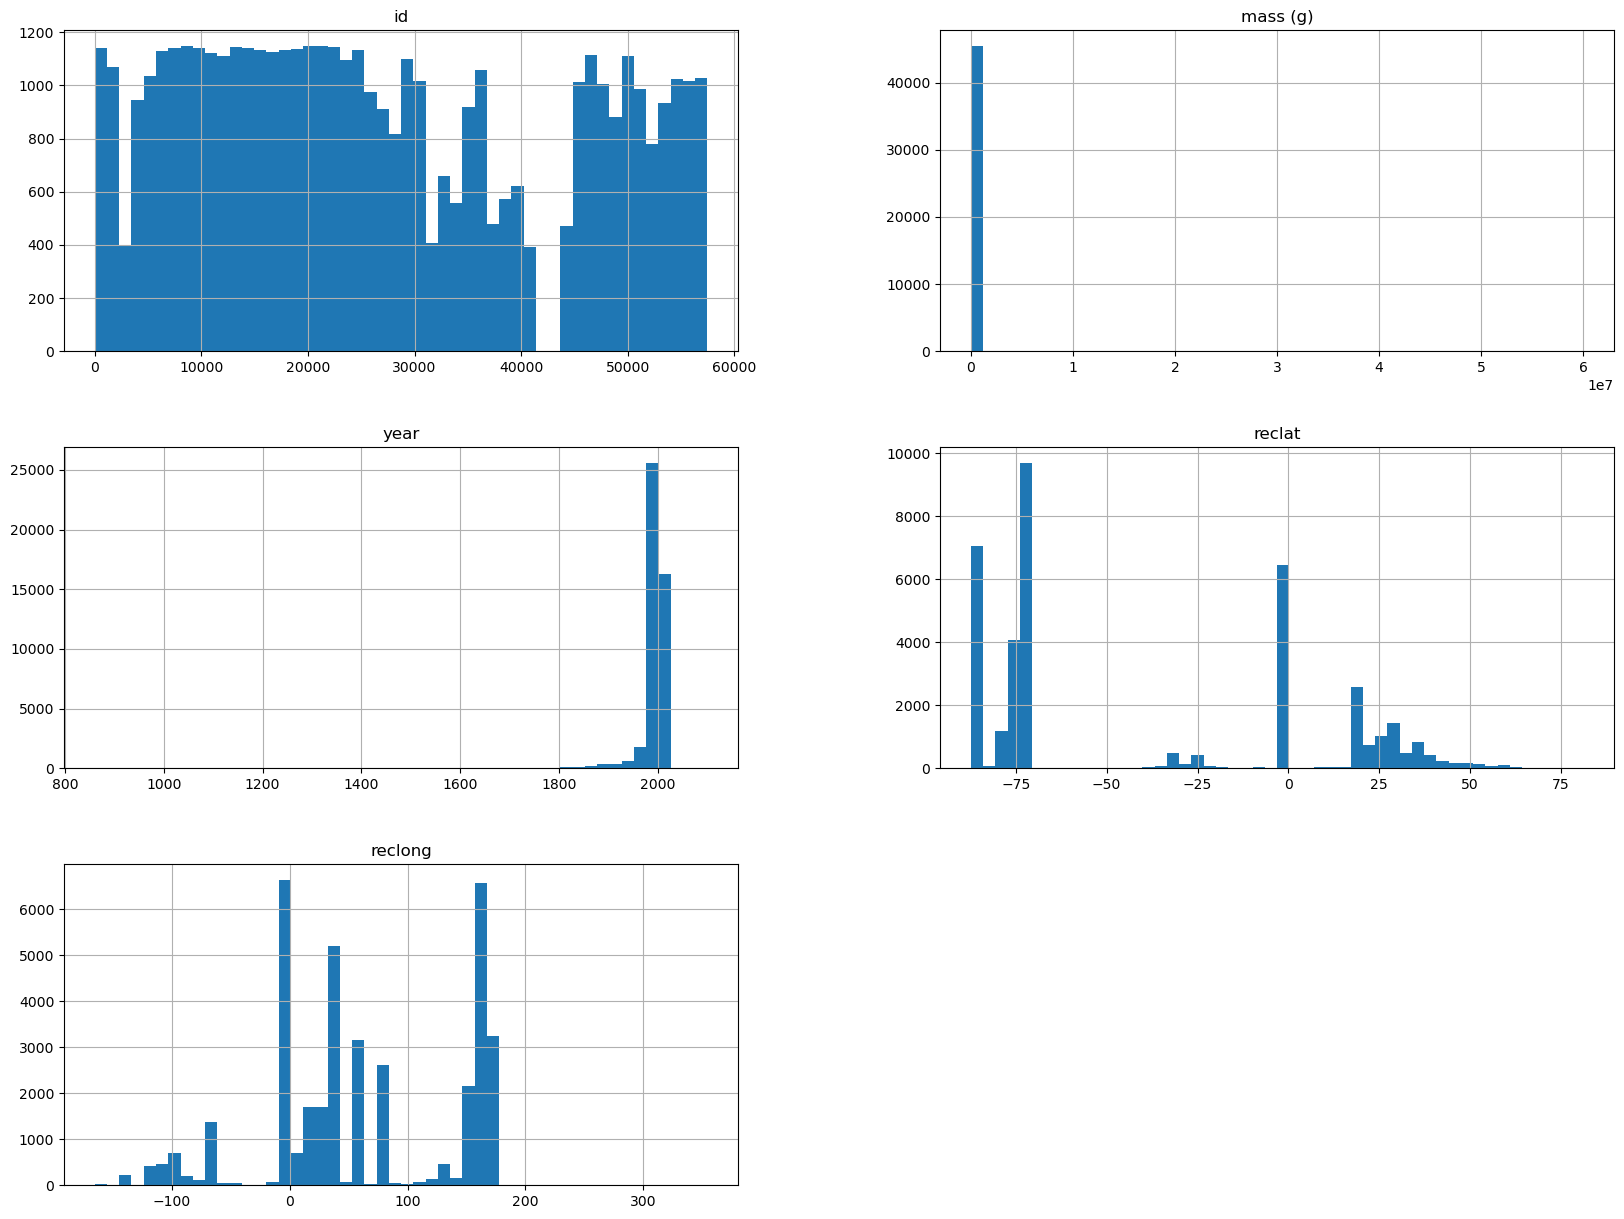

In [129]:
dataset.hist(bins=50, figsize=(20,15)) # histogram of all columns

In [135]:
dataset.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

<Axes: xlabel='year'>

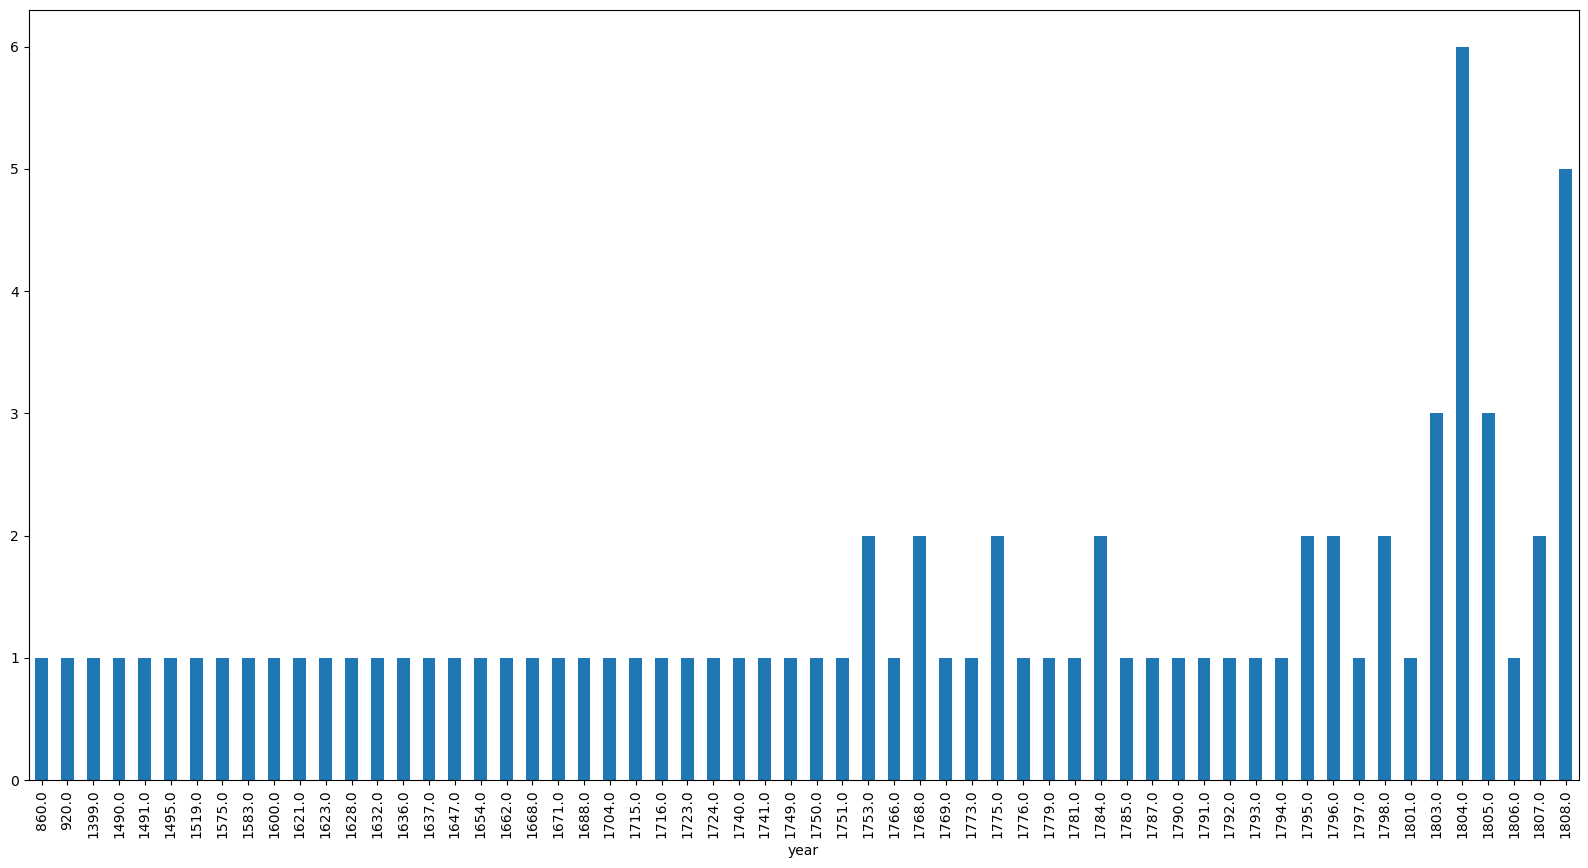

In [194]:
dt = dataset.groupby(['year'])['fall'].count().head(60) # group by and count
dt.plot(kind='bar', figsize=(20,10)) # bar plot
# dt